<a href="https://colab.research.google.com/github/Deepakkarki24/Bike-Sharing-Demand-Prediction/blob/main/Deepak_Karki_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **1. Import libraries and load the dataset**

In [ ]:
# Import libararies

# for Data Manipulation
import pandas as pd
import numpy as np

# import datetime module
from datetime import datetime
import datetime as dt

# for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scipy libraries  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# import ridge and lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set data path
path = '/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/CAPSTONE PROJECT 2 - Bike Sharing Demand Prediction/Csv files/SeoulBikeData.csv'


In [ ]:
# load dataset
bike_data = pd.read_csv(path, encoding='cp1252')

In [ ]:
# create a copy of dataset
df = bike_data.copy()

# **Exploratory Data Analysis**

In [ ]:
# data head()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# data tail()
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# data shape
df.shape

(8760, 14)

In [ ]:
# get all the columns in a list format
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

**Here is our all the features of the dataset**

In [ ]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###**So we see here there 3 features which have categorical values and 1 have a datetime values rest of this 4 we have int and float kind of values.**

In [ ]:
# let see the data descriptions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


###  1. The average temperature (mean) for the year is 12.882922 degrees. As it ranges from -17.800000 (minimum) to 39.400000 (maximum).
### 2. The average wind speed for the year is 1.724 m/s, which implies that the rented bike count is directly proportional to wind speed as on higher or max. wind speed days(7.40 m/s) the no. rented bike count(3556.00) is also max.
### 3. The average snowfall is only 0.07 cm. The maximum snowfall on a particular day is 8.80 cm, which implies that when there is heavy snowfall during the peak of winters leading to decreasing or min. the no. of rented bike count.

In [ ]:
# check null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### **Dataset have no null and missing values in the dataset**

In [ ]:
# unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# check the duplicate values 
print('The duplicate values is :', df.duplicated().sum())

The duplicate values is : 0


## **Univariate Stat**

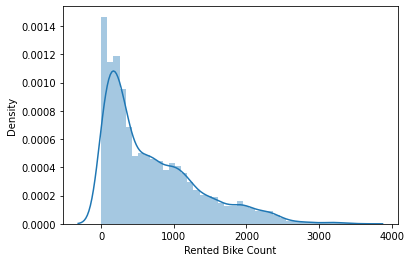

In [ ]:
#checking the density distribution of dependent variable "Rented Bike Count"
sns.distplot(df['Rented Bike Count'])

In the above observation we can clearly see that a distortion or asymmetry is deviating from the symmetrical bell curve plot by the given data, hence the distribution of the dependent variable is skewed.

So we will apply numpy.log1p() for transforming the data.

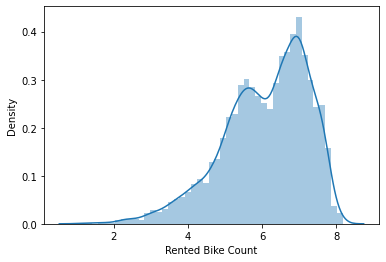

In [ ]:
#Applying numpy.log1p() transformation
sns.distplot(np.log1p(df['Rented Bike Count'].replace(0, np.nan)))

## **Visualizing Numerical Variables**

In [ ]:
#Obtaining the numerical variables
num_variables = df.describe().columns

#Converting numerical variables to list
num_variables = num_variables.to_list()

print(num_variables)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


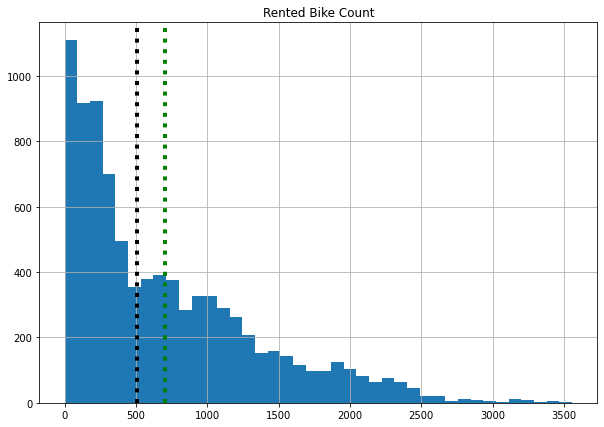

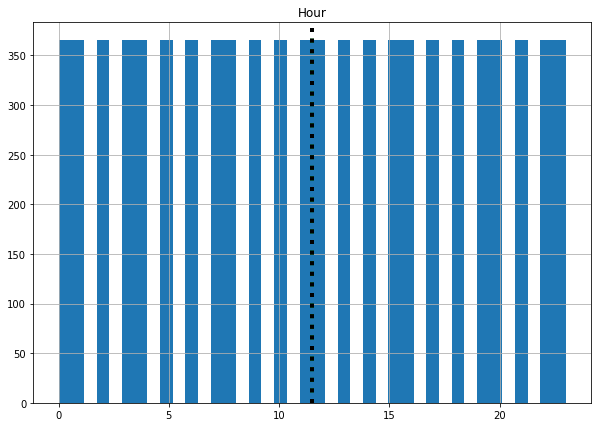

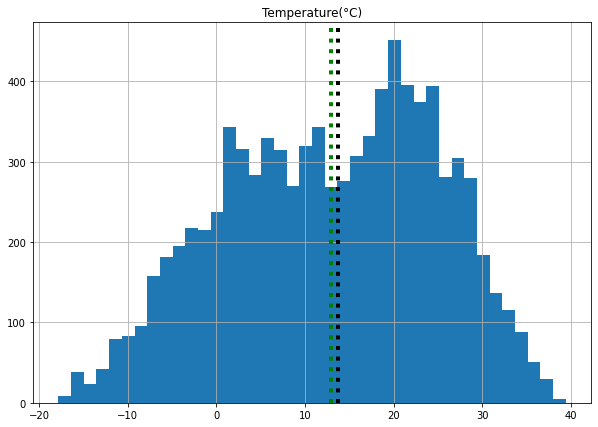

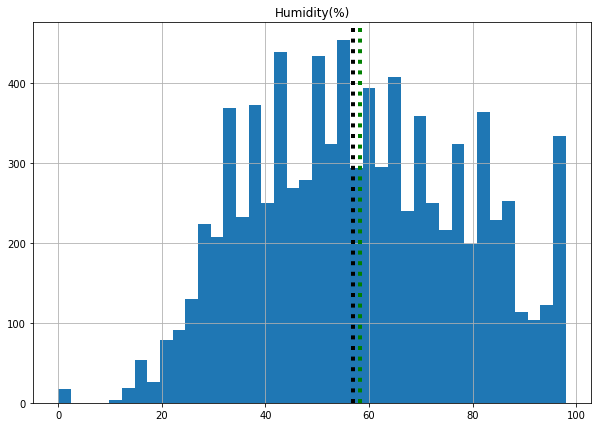

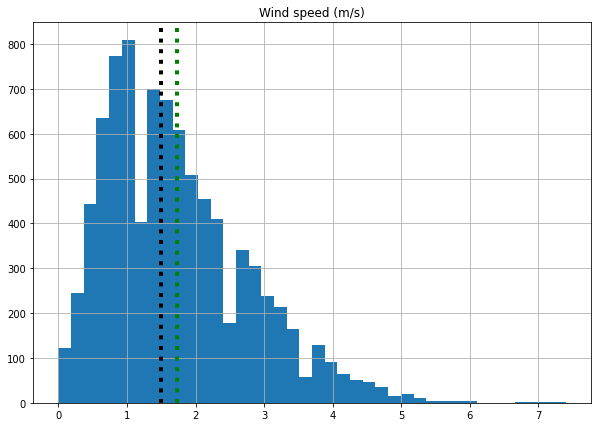

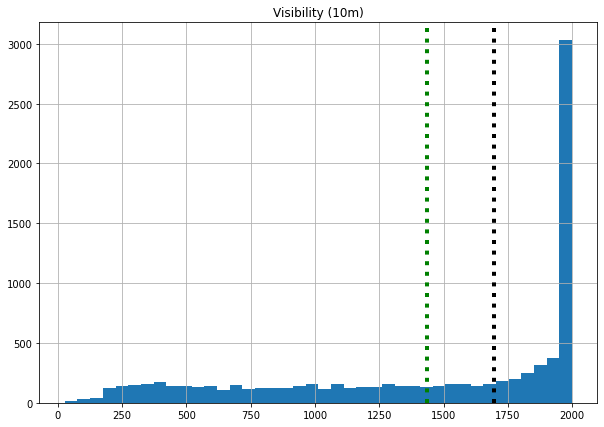

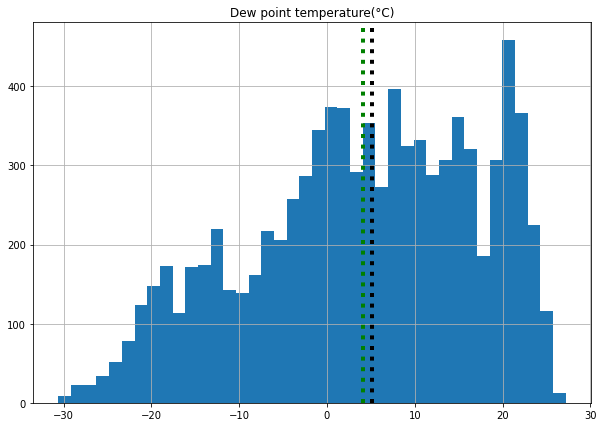

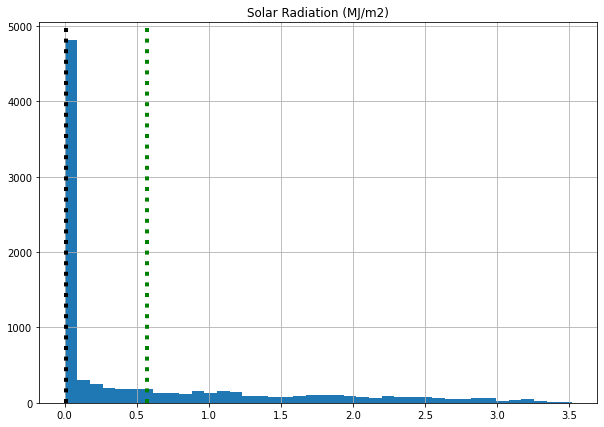

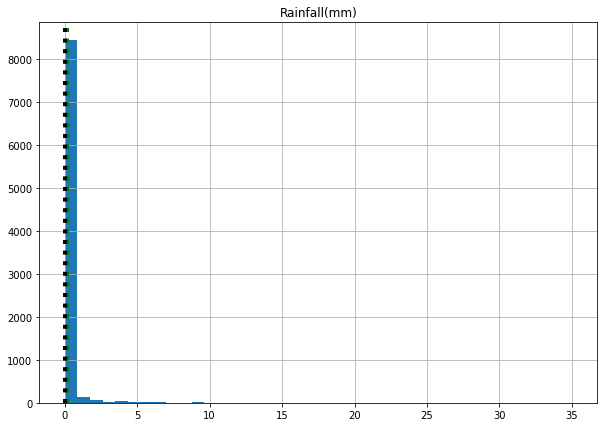

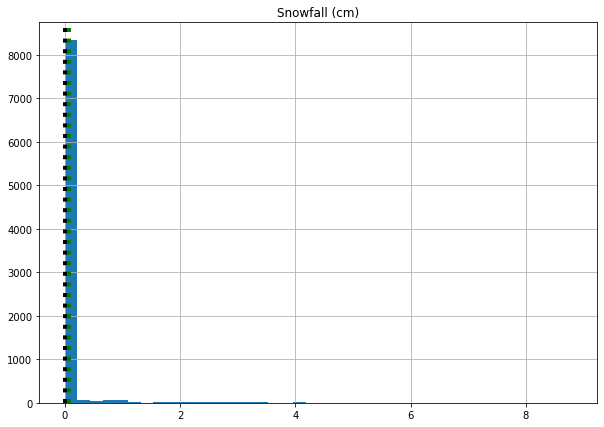

In [ ]:
from re import X
# plot a bar plot for each numerical feature count 
for col in num_variables:
    plot = plt.figure(figsize=(10, 7))
    x = plot.gca()

    #Obtaining histogram
    df[col].hist(bins=40, ax = x)

    #Show mean and median
    x.axvline(df[col].mean(), color='green', linestyle='dotted', linewidth=4)
    x.axvline(df[col].median(), color='black', linestyle='dotted', linewidth=4)    
    x.set_title(col)
#Show the graph
plt.show()

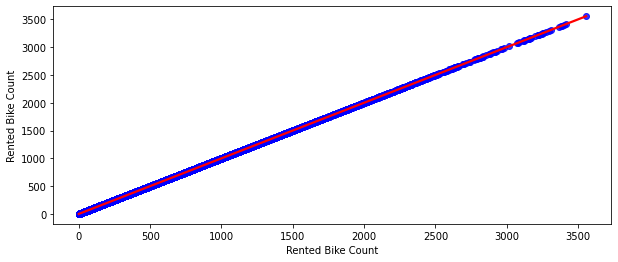

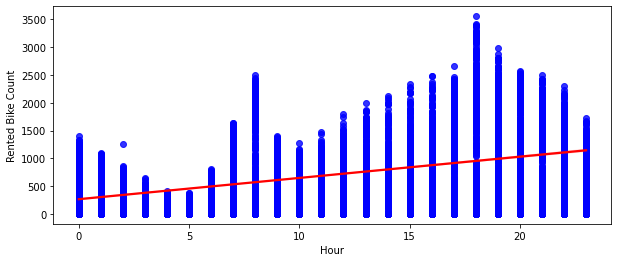

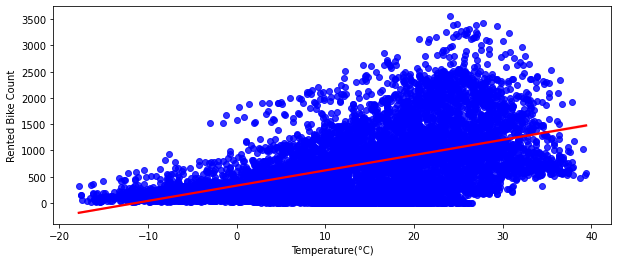

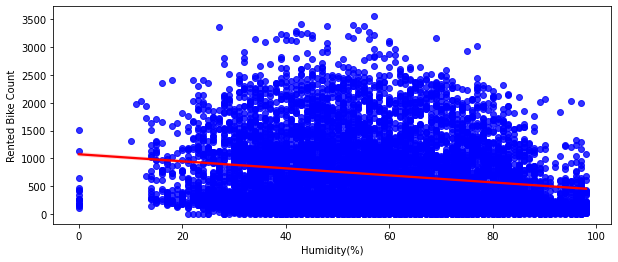

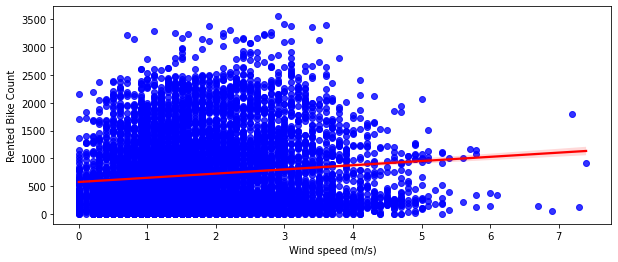

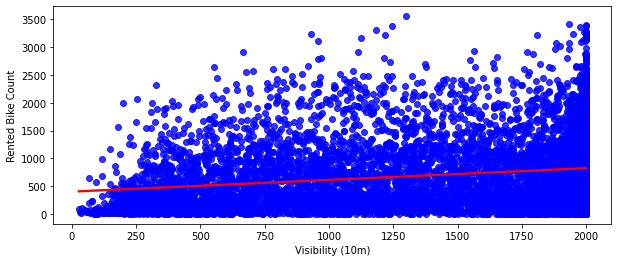

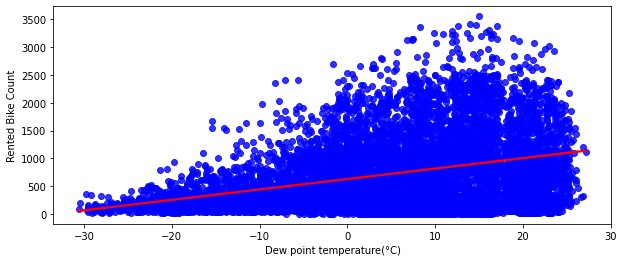

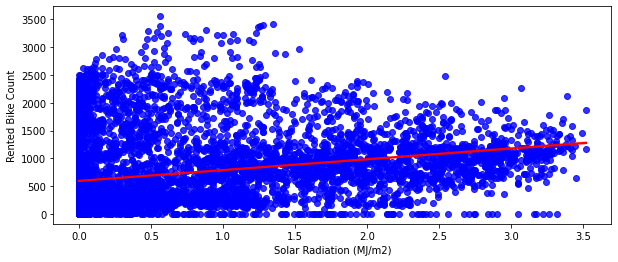

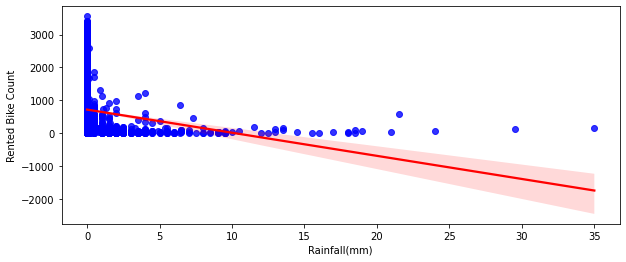

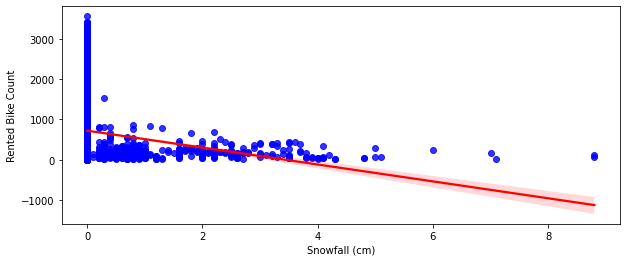

In [ ]:
#Checking the correlation between numerical variables and the dependent variable including dependent variable
# regplot for numeric features
for col in num_variables:
  fig,ax = plt.subplots(figsize=(10,4))
  sns.regplot(x=df[col], y=df['Rented Bike Count'], scatter_kws={'color': 'blue'}, line_kws={'color':'red'})


## **Heatmap Plot**

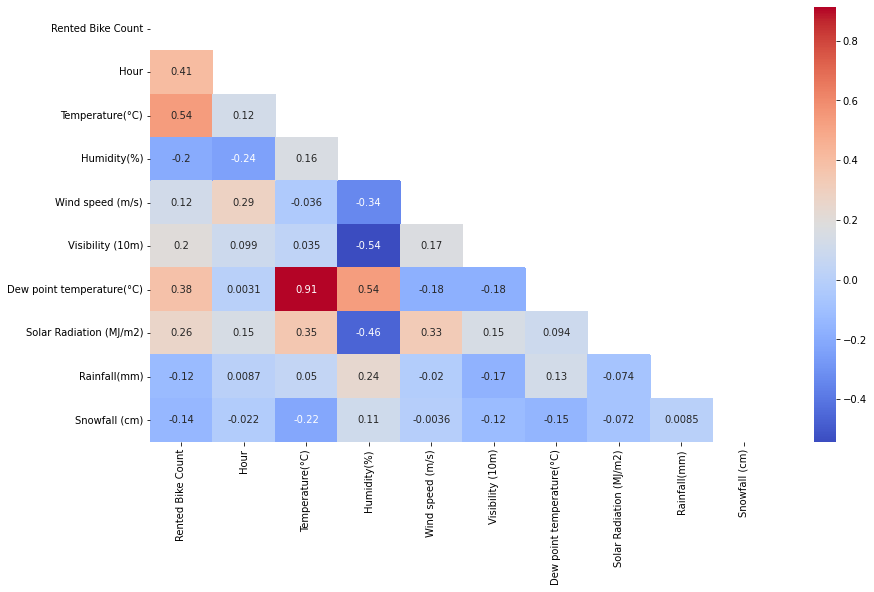

In [ ]:
# Let's check the correlation coefficients to see which Numerical variables are highly correlated by plotting a heat map. 
plt.figure(figsize = (14,8))
correlation= df.corr()
mask= np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), mask=mask, annot=True, cmap='coolwarm')
plt.show()

# **Insights from the above Heatmap:**

## **1. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.** ##
## **2. We can observe that the numeric variables Temperature and Dew Point Temperature exhibit a high correlation, Also humidity & visibiity(10m) have a good negative correlation.** ##
## **3. We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.** ##

In [ ]:
# We can observe that the features Temperature and Dew Point Temperature exhibit a high correlation. Therefore we will drop the column Dew Point temperature to prevent multicollinearity.
#Drop column
df.drop("Dew point temperature(°C)",axis=1,inplace=True)

# **Correlation Analysis**

# **Regression Plots vs. Temperature, Humidity and Windspeed**

### **Using seaborn to get regression plots with respect to Temperature, Humidity and Windspeed.**

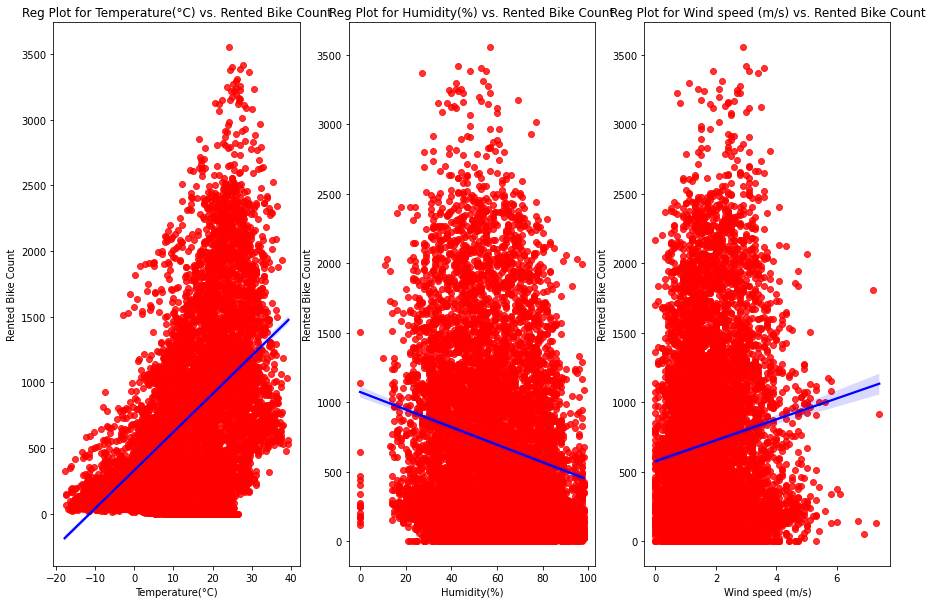

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='Temperature(°C)', y='Rented Bike Count',ax=axes, color='r', line_kws={'color':'blue'} )
axes.set(title='Reg Plot for Temperature(°C) vs. Rented Bike Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='Humidity(%)', y='Rented Bike Count',ax=axes, color='r',  line_kws={'color':'blue'})
axes.set(title='Reg Plot for Humidity(%) vs. Rented Bike Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='Wind speed (m/s)', y='Rented Bike Count',ax=axes, color='r',  line_kws={'color':'blue'})
axes.set(title='Reg Plot for Wind speed (m/s) vs. Rented Bike Count')
plt.show()

# **VIF Analysis**

**We use VIF analysis to check the level of collinearity among the independent and dependent variables.**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

   #Function calling ... dropping the year column
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


VIF value is under 5. Therefore we assume that the multicollinearity between the independent variables is negligible. So now basicially it is good to build the linear regression model

## **Demand for rental bikes during different hours of the day**

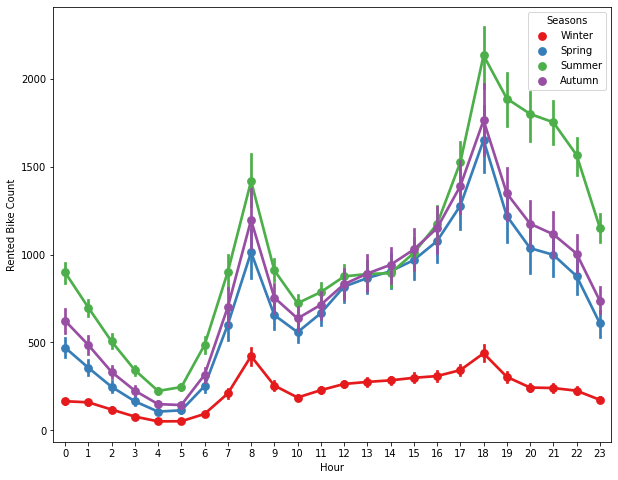

In [ ]:
plt.figure(figsize = (10, 8)) 
sns.pointplot(x ='Hour', y ='Rented Bike Count', data = df, palette='Set1', hue='Seasons')

1. People prefer to hire bikes during morning & evening hours, as seen by the sharp increase in rentals from 6:00 am to 9:00 am and 5 pm to 7 pm is the peak time.

2. We can claim that there is a lot of high demand at the opening and closing hours of offices because it is apparent that demand increases steadily at 10 a.m.

3. After 10:00 AM and through 6:00 PM, there is a steady increase in the demand for rental bikes.

4. The orange colour represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

5. Early hours(1:00 AM to 6:00 AM) is when there is least demand for bicycles. Regardless,of the seasons, this has been the general trend noticed.

# **Visualizing Catagorical Variables**

In [ ]:
#Checking the data types
df.dtypes

Date                        object
Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
dtype: object

In [ ]:
categorical_objects = df.describe(include=["object"]).columns.tolist()
print("Categorical variables are", categorical_objects)

Categorical variables are ['Date', 'Seasons', 'Holiday', 'Functioning Day']


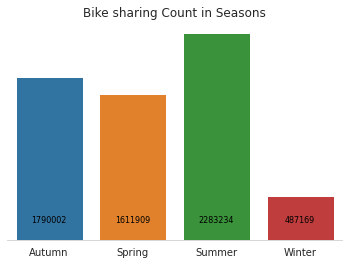

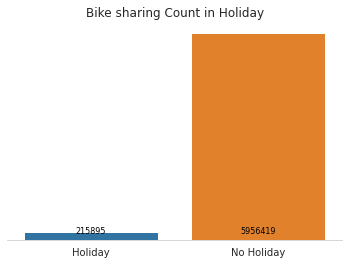

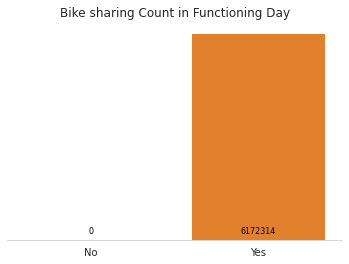

In [ ]:
# Plotting bar graph for categorical variables
sns.set_style("whitegrid")
for i in categorical_objects[1:]:  
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  
  if df[i].nunique() < 5:      #.... ensuring categorical variable with not more than 5 unique values are considerd
    df_sample = df.groupby([i]).sum().reset_index().iloc[:,:2]
    sns.barplot(data = df_sample, x = df_sample[i], y = 'Rented Bike Count',ci = None, ax = ax)  # ... Creating the bargrahph 
    plt.title('Bike sharing Count in ' + i)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left = True)
    plt.yticks([])

    for j in range(len((df[i].unique()))):
      plt.text(x = j , y = 200000, s = df_sample.loc[j,'Rented Bike Count'],color='black', fontsize=8, horizontalalignment='center')

**Most number of Bikes are rented in Summer, followed by Autumn and Spring and Winter.**

**People prefer booking bikes on Working days more than the Holidays**.

**All the bikes were rented on the functioning day.**

## **Dealing with Outliers**

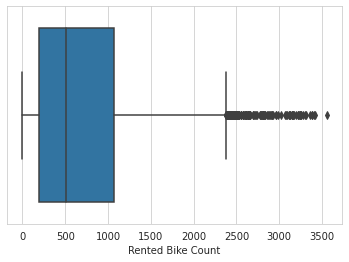

In [ ]:
# Checking for outliers in the dataset
sns.boxplot(data = df, x ='Rented Bike Count')

As we see there are many outliers in the dataset need to drop them for the accurate model predictions.

In [ ]:
# Defining the interquartile range for Dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['Rented Bike Count'])

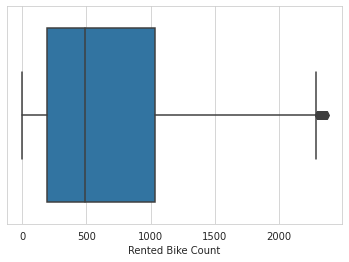

In [ ]:
# Removing outliers from the data
df_subset = df[(df['Rented Bike Count']>lower_bound) & (df['Rented Bike Count'] <upper_bound)]
sns.boxplot(data = df_subset, x = 'Rented Bike Count')

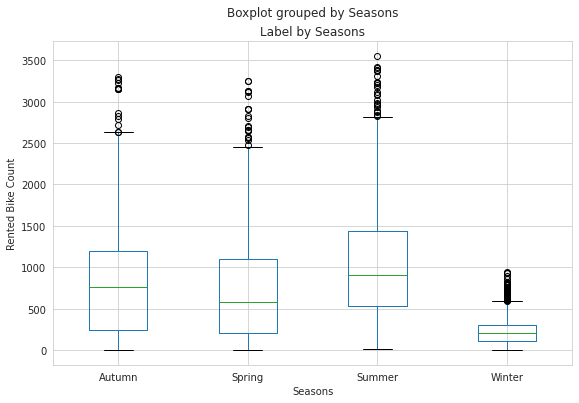

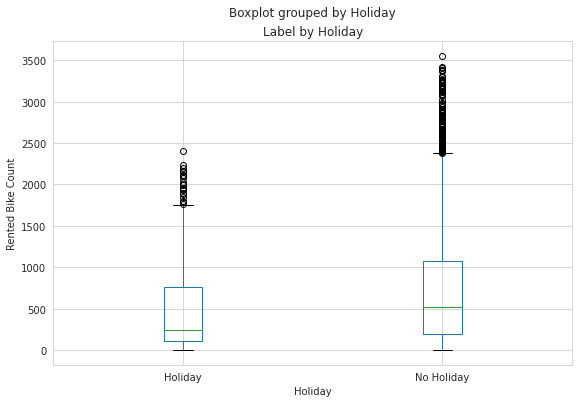

In [ ]:
#checking outliers for categorical variables by plotting boxplot
for col in categorical_objects:
  if col not in ["Date","Functioning Day"]:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
      ax.set_title('Label by ' + col)
      ax.set_ylabel('Rented Bike Count')
plt.show()

In [ ]:
#Label encoding
label={'Holiday':{'Holiday':1,'No Holiday':0},'Functioning Day':{'Yes':0,'No':1}}
df = df.replace(label)

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'seasons'.
df['Seasons']= label_encoder.fit_transform(df['Seasons'])

#Obtain unique elements in "Seasons" 
df['Seasons'].unique()

array([3, 1, 2, 0])

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [ ]:
#Drop date column
df.drop(["Date"],axis=1,inplace=True)

In [ ]:
#List of important features
imp_features = df.describe(include="all").columns.tolist()
print(imp_features) #Important features after feature engineering are as follows..

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


# **Splitting Dataset Into Train & Test**